In [1]:
# Import necessary libraries
import pandas as pd
import statsmodels.formula.api as smf

# Load your dataset (adjust path if needed)
df = pd.read_csv('16_QSurvey.csv', encoding='ISO-8859-1')

# Clean 'Treatment' column
df['Treatment'] = df['Treatment'].astype(str).str.strip().str.lower()

# Drop missing values for relevant columns
df_clean = df[['Defensive_Alignment', 'Treatment']].dropna()

# Run OLS regression: Does treatment affect defensive alignment?
model = smf.ols('Defensive_Alignment ~ Treatment', data=df_clean).fit()

# Print regression results
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Defensive_Alignment   R-squared:                       0.003
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     1.210
Date:                 Wed, 23 Jul 2025   Prob (F-statistic):              0.272
Time:                         17:02:35   Log-Likelihood:                -464.94
No. Observations:                  402   AIC:                             933.9
Df Residuals:                      400   BIC:                             941.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept           

In [2]:
df_mod = df[['Defensive_Alignment', 'Treatment', 'Nationalism']].dropna()
interaction_model = smf.ols('Defensive_Alignment ~ Treatment * Nationalism', data=df_mod).fit()
print(interaction_model.summary())


                             OLS Regression Results                            
Dep. Variable:     Defensive_Alignment   R-squared:                       0.024
Model:                             OLS   Adj. R-squared:                  0.017
Method:                  Least Squares   F-statistic:                     3.248
Date:                 Wed, 23 Jul 2025   Prob (F-statistic):             0.0219
Time:                         17:02:35   Log-Likelihood:                -460.69
No. Observations:                  402   AIC:                             929.4
Df Residuals:                      398   BIC:                             945.4
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

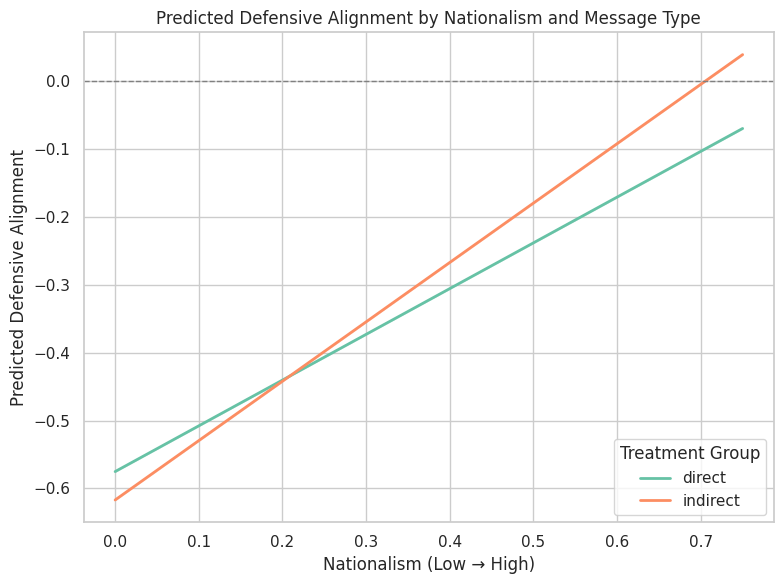

                             OLS Regression Results                            
Dep. Variable:     Defensive_Alignment   R-squared:                       0.024
Model:                             OLS   Adj. R-squared:                  0.017
Method:                  Least Squares   F-statistic:                     3.248
Date:                 Wed, 23 Jul 2025   Prob (F-statistic):             0.0219
Time:                         17:02:38   Log-Likelihood:                -460.69
No. Observations:                  402   AIC:                             929.4
Df Residuals:                      398   BIC:                             945.4
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [3]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("16_QSurvey.csv", encoding="ISO-8859-1")

# Clean and filter relevant variables
df['Treatment'] = df['Treatment'].astype(str).str.strip().str.lower()
df = df[['Defensive_Alignment', 'Treatment', 'Nationalism']].dropna()

# Run interaction regression
model = smf.ols('Defensive_Alignment ~ Treatment * Nationalism', data=df).fit()

# Add predicted values to the dataframe
df['Predicted'] = model.predict(df)

# Set seaborn style
sns.set(style="whitegrid")

# Plot the predicted values
plt.figure(figsize=(8, 6))
sns.lineplot(
    x='Nationalism',
    y='Predicted',
    hue='Treatment',
    data=df,
    palette='Set2',
    linewidth=2
)

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("Predicted Defensive Alignment by Nationalism and Message Type")
plt.xlabel("Nationalism (Low → High)")
plt.ylabel("Predicted Defensive Alignment")
plt.legend(title="Treatment Group")
plt.tight_layout()
plt.show()

# Print regression summary if you want to see coefficients
print(model.summary())


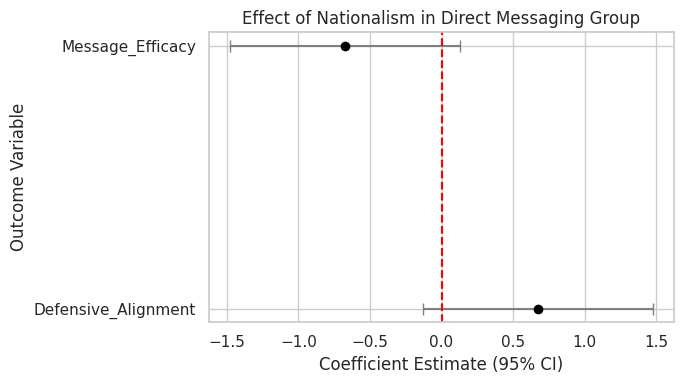

In [4]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Load and prepare dataset
df = pd.read_csv("16_QSurvey.csv", encoding="ISO-8859-1")
df['Treatment'] = df['Treatment'].astype(str).str.strip().str.lower()
df = df[['Defensive_Alignment', 'Message_Efficacy', 'Nationalism', 'Treatment']].dropna()

# Focus on Direct messaging group only
df_direct = df[df['Treatment'] == 'direct']

# Run regression: How does Nationalism affect each outcome in direct messaging?
model_def = smf.ols('Defensive_Alignment ~ Nationalism', data=df_direct).fit()
model_msg = smf.ols('Message_Efficacy ~ Nationalism', data=df_direct).fit()

# Collect results
models = {
    'Defensive_Alignment': model_def,
    'Message_Efficacy': model_msg
}

# Build coefficient table
results = []
for name, m in models.items():
    coef = m.params['Nationalism']
    lower, upper = m.conf_int().loc['Nationalism']
    results.append({'Outcome': name, 'Coefficient': coef, 'CI Lower': lower, 'CI Upper': upper})

coef_df = pd.DataFrame(results)

# Plot
plt.figure(figsize=(7, 4))
plt.errorbar(
    x=coef_df['Coefficient'],
    y=coef_df['Outcome'],
    xerr=[coef_df['Coefficient'] - coef_df['CI Lower'], coef_df['CI Upper'] - coef_df['Coefficient']],
    fmt='o',
    color='black',
    ecolor='gray',
    capsize=4
)

plt.axvline(0, color='red', linestyle='--')
plt.title("Effect of Nationalism in Direct Messaging Group")
plt.xlabel("Coefficient Estimate (95% CI)")
plt.ylabel("Outcome Variable")
plt.tight_layout()
plt.show()


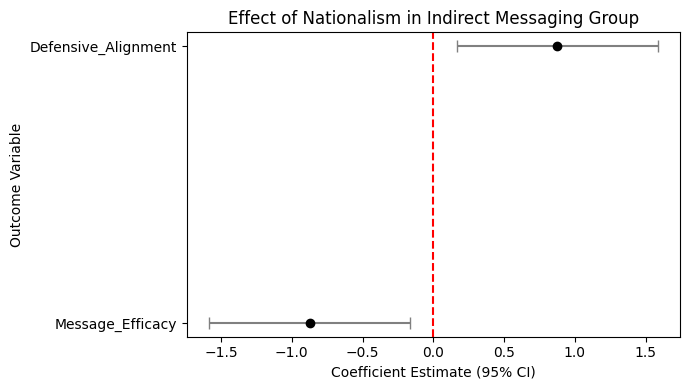

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("16_QSurvey.csv", encoding="ISO-8859-1")

# Standardize treatment labels
df['Treatment'] = df['Treatment'].astype(str).str.strip().str.lower()

# Filter to indirect group only
df_indirect = df[df['Treatment'] == 'indirect']

# Drop rows with missing data in relevant columns
df_indirect = df_indirect[['Nationalism', 'Message_Efficacy', 'Defensive_Alignment']].dropna()

# Regressions
model_me = smf.ols('Message_Efficacy ~ Nationalism', data=df_indirect).fit()
model_da = smf.ols('Defensive_Alignment ~ Nationalism', data=df_indirect).fit()

# Extract coefficients and confidence intervals
results = []
for var, model in [('Message_Efficacy', model_me), ('Defensive_Alignment', model_da)]:
    coef = model.params['Nationalism']
    ci_low, ci_high = model.conf_int().loc['Nationalism']
    results.append({'Outcome': var, 'Coefficient': coef, 'CI Low': ci_low, 'CI High': ci_high})

coef_df = pd.DataFrame(results)

# Plot
plt.figure(figsize=(7, 4))
plt.errorbar(
    x=coef_df['Coefficient'],
    y=coef_df['Outcome'],
    xerr=[coef_df['Coefficient'] - coef_df['CI Low'], coef_df['CI High'] - coef_df['Coefficient']],
    fmt='o',
    color='black',
    ecolor='gray',
    capsize=4
)
plt.axvline(0, color='red', linestyle='--')
plt.title("Effect of Nationalism in Indirect Messaging Group")
plt.xlabel("Coefficient Estimate (95% CI)")
plt.ylabel("Outcome Variable")
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import statsmodels.formula.api as smf

# Load your data (update the path if needed)
df = pd.read_csv("16_QSurvey.csv", encoding='latin1')

# Clean Treatment column
df['Treatment'] = df['Treatment'].str.strip().str.lower()

# Filter to only include valid groups
df = df[df['Treatment'].isin(['direct', 'indirect'])]

# Drop rows with missing values in key columns
model_vars = ['Message_Efficacy', 'Defensive_Alignment', 'Nationalism', 'Treatment']
df = df[model_vars].dropna()

# Split into treatment and control groups
df_direct = df[df['Treatment'] == 'direct']
df_indirect = df[df['Treatment'] == 'indirect']

# Model 1: Message_Efficacy ~ Nationalism for direct
me_direct = smf.ols('Message_Efficacy ~ Nationalism', data=df_direct).fit()

# Model 2: Defensive_Alignment ~ Nationalism for direct
da_direct = smf.ols('Defensive_Alignment ~ Nationalism', data=df_direct).fit()

# Model 3: Message_Efficacy ~ Nationalism for indirect
me_indirect = smf.ols('Message_Efficacy ~ Nationalism', data=df_indirect).fit()

# Model 4: Defensive_Alignment ~ Nationalism for indirect
da_indirect = smf.ols('Defensive_Alignment ~ Nationalism', data=df_indirect).fit()

# Print summaries
print("🔹 Direct Group: Message Efficacy ~ Nationalism\n", me_direct.summary())
print("\n🔹 Direct Group: Defensive Alignment ~ Nationalism\n", da_direct.summary())
print("\n🔸 Indirect Group: Message Efficacy ~ Nationalism\n", me_indirect.summary())
print("\n🔸 Indirect Group: Defensive Alignment ~ Nationalism\n", da_indirect.summary())


🔹 Direct Group: Message Efficacy ~ Nationalism
                             OLS Regression Results                            
Dep. Variable:       Message_Efficacy   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.743
Date:                Thu, 24 Jul 2025   Prob (F-statistic):             0.0992
Time:                        04:32:05   Log-Likelihood:                -234.52
No. Observations:                 201   AIC:                             473.0
Df Residuals:                     199   BIC:                             479.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
In